### Importing all the necessary libraries for the Dyslexia Destection

In [3]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt# doctest: +SKIP
from sklearn.metrics import mean_absolute_error
%matplotlib inline

### Importing, cleaning and preprocessing the dataset 

In [4]:
#Reading the dataset
data=pd.read_csv('labelled_data_new.csv')
#Value to be predicted by the model.
y=data.Label 
#Input taken by the model.
X=data.drop(['Label'],axis=1) 
data.head()

,Language_vocab,Memory,Speed,Visual_discrimination,Audio_Discrimination,Survey_Score,Label
0,0.5,0.6,0.5,0.8,0.6,0.7,1.0
1,0.6,0.7,0.8,0.9,0.5,0.8,2.0
2,0.6,0.4,0.3,0.3,0.4,0.6,1.0
3,0.3,0.5,0.2,0.1,0.3,0.5,0.0
4,0.7,0.6,0.7,0.8,0.9,0.5,2.0


In [3]:
# print the shape of the DataFrame, so we can see how many examples we have
print(data.loc[0])

Language_vocab           0.5
Memory                   0.6
Speed                    0.5
Visual_discrimination    0.8
Audio_Discrimination     0.6
Survey_Score             0.7
Label                    1.0
Name: 0, dtype: float64


In [4]:
# print out multiple patients at the same time
data.loc[:10]

,Language_vocab,Memory,Speed,Visual_discrimination,Audio_Discrimination,Survey_Score,Label
0,0.5,0.6,0.5,0.8,0.6,0.7,1.0
1,0.6,0.7,0.8,0.9,0.5,0.8,2.0
2,0.6,0.4,0.3,0.3,0.4,0.6,1.0
3,0.3,0.5,0.2,0.1,0.3,0.5,0.0
4,0.7,0.6,0.7,0.8,0.9,0.5,2.0
5,0.4,0.1,0.0,0.1,0.4,0.2,0.0
6,0.8,1.0,0.8,0.9,0.6,0.6,2.0
7,0.5,0.3,0.5,0.4,0.7,0.4,1.0
8,0.6,0.5,0.5,0.4,0.6,0.5,1.0
9,0.6,0.7,0.7,0.8,0.7,0.6,1.0


In [5]:
print("------ Printing the first 5 rows from the dataset to check the whether the data has been fetched properly or not :")
print(data.head(5)) 

pd.set_option("display.max.columns", None)

print("\n------ Total Number Of Rows and Colums In The Dataset :\n",data.shape)

print("\n------ See the all the Columns Present In The Dataset :\n")
print(data.columns.values )

print("\n------ The Information about each Column of the dataset (including their datatypes and the type of values (Null/Not Null) :\n")
print("\n------ Checking whether the Dataset has any Data Quality Issues such as Having NULL Values\n")
print(data.info())

print("\n------ Finding out the count, mean, standard deviation, minimum and maximum values and the quantiles of the data in the Dataset :\n")
print(data.describe())

------ Printing the first 5 rows from the dataset to check the whether the data has been fetched properly or not :
   Language_vocab  Memory  Speed  Visual_discrimination  Audio_Discrimination  \
0             0.5     0.6    0.5                    0.8                   0.6   
1             0.6     0.7    0.8                    0.9                   0.5   
2             0.6     0.4    0.3                    0.3                   0.4   
3             0.3     0.5    0.2                    0.1                   0.3   
4             0.7     0.6    0.7                    0.8                   0.9   

   Survey_Score  Label  
0           0.7    1.0  
1           0.8    2.0  
2           0.6    1.0  
3           0.5    0.0  
4           0.5    2.0  

------ Total Number Of Rows and Colums In The Dataset :
 (500, 7)

------ See the all the Columns Present In The Dataset :

['Language_vocab' 'Memory' 'Speed' 'Visual_discrimination'
 'Audio_Discrimination' 'Survey_Score' 'Label']

------ The Info


------ To check the Missing Values In the Dataset :



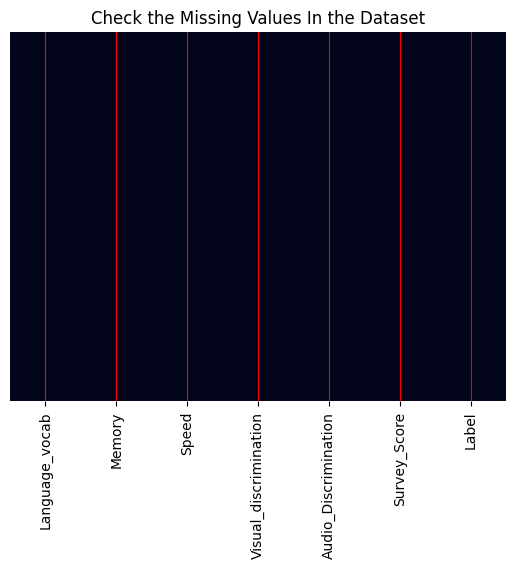

In [6]:
print("\n------ To check the Missing Values In the Dataset :\n")
sns.heatmap(data.isnull(),cbar=False,yticklabels=False)
plt.title("Check the Missing Values In the Dataset")
plt.grid(True,color='r')
plt.show()


------ Finding out the Correlations Between The Different Variables Using the HEAT MAP :



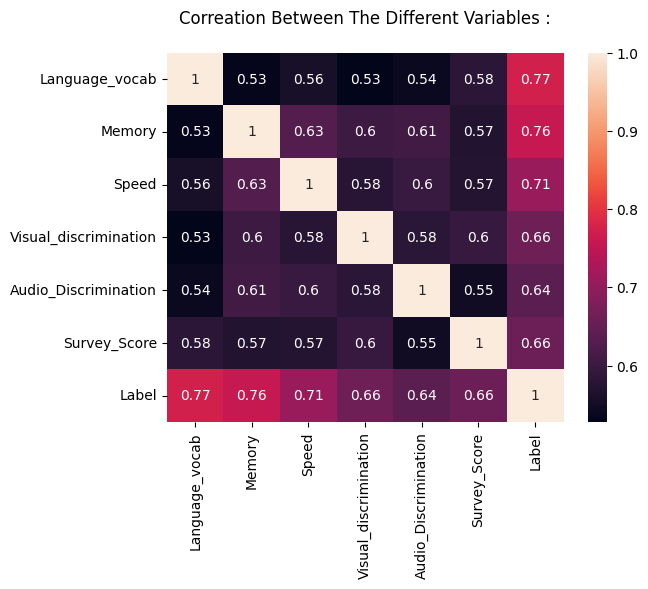

In [7]:
print("\n------ Finding out the Correlations Between The Different Variables Using the HEAT MAP :\n")
correlations=data.corr()

sns.heatmap(correlations,annot=True)
plt.title("Correation Between The Different Variables :\n")
plt.show()

### Training and testing datasets

In [8]:
#In the given data, the label is the indication for whether the person has dislexia or not.
#Label = 0 means that there is a high chance that the person has dislexia.
#Label = 1 means that there is a moderte chance that the person has dislexia.
#Label = 2 means that there is a low chance that the person has dislexia.
#The Survey_Score is calculated on the basis of the answers to the quiz given by the applicant.

In [9]:
#The following test cases will be used to check the values given by each model.
test1 = np.array([[0.5, 0.1, 0.2, 0.8, 0.3, 0.5]]) #Readings for applicant 1.
test2 = np.array([[0.7, 0.9, 0.4, 0.9, 0.3, 0.8]]) #Readings for applicant 2.
test3 = np.array([[0.1, 0.7, 0.2, 0.6, 0.9, 0.6]]) #Readings for applicant 3.
test4 = np.array([[0.3, 0.4, 0.5, 0.3, 0.3, 0.5]]) #Readings for applicant 4.

In [10]:
#Creating the test and train data sets for the given data.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.8,random_state=10)
#list to store precision values of each model.
precision = [0, 0, 0, 0, 0]
#list to store recall values of each model.
recall = [0, 0, 0, 0, 0]
#list to store f1-score values of each model.
fscore = [0, 0, 0, 0, 0]
#list to store error in predictions of each model.
error = [.0, .0, .0, .0, .0]

In [11]:
#StandardScalar is used for preprocessing of data.
#'copy' is False, which means copies are avoid and inplace scaling is done instead.
sc=StandardScaler(copy=False)
sc.fit_transform(X_train)
sc.transform(X_test)

array([[-0.40859278,  0.09423675,  0.57481025,  1.09456548,  0.51247074,
         0.54374235],
       [ 2.0828266 ,  0.54298319, -0.30276265,  0.14688974,  0.01971041,
         0.54374235],
       [ 0.0896911 ,  0.09423675,  0.1360238 , -1.27462388, -0.47304992,
         0.1016754 ],
       ...,
       [-0.90687665, -0.80325613, -0.7415491 , -1.74846175, -1.45857058,
        -1.22452545],
       [-0.90687665,  0.54298319, -0.30276265,  0.14688974, -0.47304992,
         0.1016754 ],
       [ 0.58797497,  0.09423675,  0.57481025,  2.04224123, -0.47304992,
         0.54374235]])

In [12]:
#Creating lists of label outputs given in each test case by different models
label_1 = [0, 0, 0, 0, 0]
label_2 = [0, 0, 0, 0, 0]
label_3 = [0, 0, 0, 0, 0]
label_4 = [0, 0, 0, 0, 0]

## Model : Descison Tree Model (Supervised ML)

In [13]:
#Creating the DecisionTree model.
dt = DecisionTreeClassifier(random_state = 1)
#Training the model.
dt.fit(X_train, y_train)
#Making predictions using the decision tree model.
pred_dt = dt.predict(X_test)
#Calculating error
error[0] = round(mean_absolute_error(y_test, pred_dt), 3)

In [14]:
#Testing the model with predefined test cases.
ans_1 = dt.predict((test1))
ans_2 = dt.predict((test2))
ans_3 = dt.predict((test3))
ans_4 = dt.predict((test4))

#Storing the above predictions into respective lists.
label_1[0] = ans_1[0]
label_2[0] = ans_2[0]
label_3[0] = ans_3[0]
label_4[0] = ans_4[0]

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[ 38  10   0]
 [  9 187  27]
 [  0  19 110]]


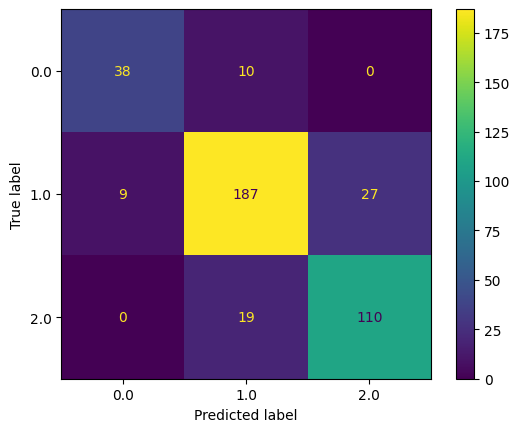

For a DecisionTreeClassifier:  Precision = 0.826, Recall = 0.828, F1-score = 0.826


In [15]:
#Confusion matrix for Decision tree model.
print(confusion_matrix(np.array(y_test), pred_dt))
plot_confusion_matrix(dt, X_test, y_test)
plt.show()
#Finding precision, recall and f-score for Decision Tree Model and updating values in respective lists.
precision[0], recall[0], fscore[0], Nil = precision_recall_fscore_support(y_test, pred_dt, average='macro')
print('For a DecisionTreeClassifier:  Precision = %.3f, Recall = %.3f, F1-score = %.3f'%(precision[0], recall[0], fscore[0]))

## Model : Random Classifier

In [16]:
#Creating the RandomClassifier model.
rf = RandomForestClassifier(random_state = 0) 
#Training the model.
rf.fit(X_train, y_train)
#Making predictions using the model.
pred_rf = rf.predict(X_test)
#Calculating error
error[1] = round(mean_absolute_error(y_test, pred_rf), 3)

In [17]:
#Testing the model with predefined test cases.
ans_1 = rf.predict((test1))
ans_2 = rf.predict((test2))
ans_3 = rf.predict((test3))
ans_4 = rf.predict((test4))

#Storing the above predictions into respective lists.
label_1[1] = ans_1[0]
label_2[1] = ans_2[0]
label_3[1] = ans_3[0]
label_4[1] = ans_4[0]

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.

[[ 46   2   0]
 [  3 203  17]
 [  0   7 122]]


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


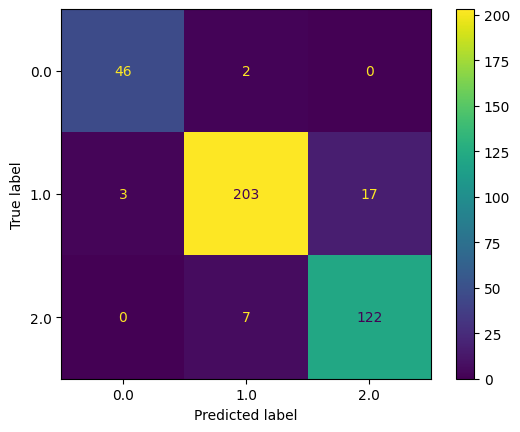

For a RandomForestClassifier:  Precision = 0.925, Recall = 0.938, F1-score = 0.931


In [18]:
#Confusion matrix for RandomForest model.
print(confusion_matrix(np.array(y_test), pred_rf))
plot_confusion_matrix(rf, X_test, y_test)
plt.show()
#Finding precision, recall and f-score for RandomForest Model and updating values in respective lists.
precision[1], recall[1], fscore[1], Nil = precision_recall_fscore_support(y_test, pred_rf, average='macro')
print('For a RandomForestClassifier:  Precision = %.3f, Recall = %.3f, F1-score = %.3f'%(precision[1], recall[1], fscore[1]))

## Model : Random Classifier with GridSearch

In [19]:
#Creating a list of possible n_estimators.
n_est = {'n_estimators' : [10,100,500,1000]}
#Creating a RandomForest model using the value of n_estimators given by GridSearch for best result.
rf_grid = GridSearchCV(RandomForestClassifier(random_state=0),n_est,scoring='f1_macro')
#Training the model
rf_grid.fit(X_train, y_train)
#Making predictions using the model.
pred_rf_grid = rf_grid.predict(X_test)
#Printing the value of n_estimator used in the model.
#This value provides the most accurate predictions for our dataset.
print('Best value of n_estimator for RandomForest model is:')
print(rf_grid.best_params_)
#Calculating error
error[3] = round(mean_absolute_error(y_test, pred_rf_grid), 3)

Best value of n_estimator for RandomForest model is:
{'n_estimators': 100}


In [20]:
#Testing the model with predefined test cases.
ans_1 = rf_grid.predict((test1))
ans_2 = rf_grid.predict((test2))
ans_3 = rf_grid.predict((test3))
ans_4 = rf_grid.predict((test4))

#Storing the above predictions into respective lists.
label_1[3] = ans_1[0]
label_2[3] = ans_2[0]
label_3[3] = ans_3[0]
label_4[3] = ans_4[0]

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[ 46   2   0]
 [  3 203  17]
 [  0   7 122]]


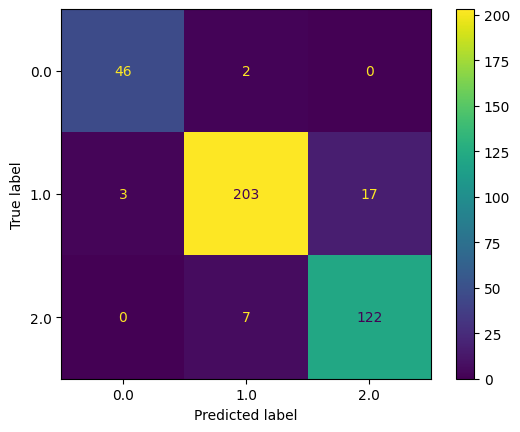

For a RandomForest model with GridSearch:  Precision = 0.925, Recall = 0.938, F1-score = 0.931


In [21]:
#Confusion matrix for RandomForest model using GridSearch
print(confusion_matrix(np.array(y_test), pred_rf_grid))
plot_confusion_matrix(rf_grid, X_test, y_test)
plt.show()
#Finding precision, recall and f-score for RandomForest (GridSearch) model and updating values in respective lists.
precision[3], recall[3], fscore[3], Nil = precision_recall_fscore_support(y_test, pred_rf_grid, average='macro')
print('For a RandomForest model with GridSearch:  Precision = %.3f, Recall = %.3f, F1-score = %.3f'%(precision[3], recall[3], fscore[3]))

## Model : Support Vector Machine

In [22]:
#Creating the SVM model.
svm = SVC(kernel = "linear")
#Training the model.
svm.fit(X_train, y_train)
#Making predictions using the model.
pred_svm = svm.predict(X_test)
#Calculating error
error[2] = round(mean_absolute_error(y_test, pred_svm), 3)

In [23]:
#Testing the model with predefined test cases.
ans_1 = svm.predict((test1))
ans_2 = svm.predict((test2))
ans_3 = svm.predict((test3))
ans_4 = svm.predict((test4))

#Storing the above predictions into respective lists.
label_1[2] = ans_1[0]
label_2[2] = ans_2[0]
label_3[2] = ans_3[0]
label_4[2] = ans_4[0]

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names,

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[ 44   4   0]
 [  4 206  13]
 [  0   9 120]]


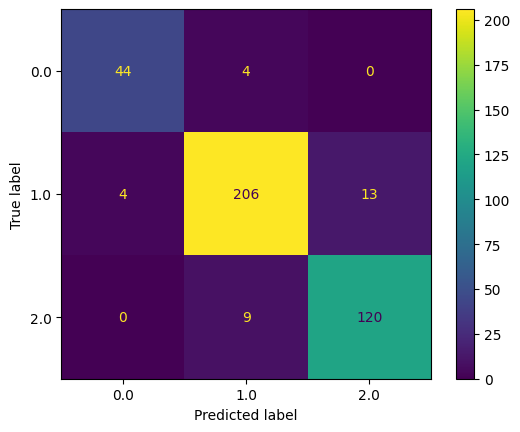

For a SVM model:  Precision = 0.920, Recall = 0.924, F1-score = 0.922


In [24]:
#Confusion matrix for SVM model
print(confusion_matrix(np.array(y_test), pred_svm))
plot_confusion_matrix(svm, X_test, y_test)
plt.show()
#Finding precision, recall and f-score for SVM model and updating values in respective lists.
precision[2], recall[2], fscore[2], Nil = precision_recall_fscore_support(y_test, pred_svm, average='macro')
print('For a SVM model:  Precision = %.3f, Recall = %.3f, F1-score = %.3f'%(precision[2], recall[2], fscore[2]))

## Model : Support Vector Machine with GridSearch

In [25]:
#options_parameters is a list of dictionaries to find the most suitable values of 'kernel', 'gamma' and 'C' for the given model.
options_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
#Creating SVM model with the most suitable parameters obtained by using GridSearch.
svm_grid = GridSearchCV(SVC(), options_parameters,scoring='f1_macro')
#Training the model.
svm_grid.fit(X_train, y_train)
#Making predictions using the model.
pred_svm_grid = svm_grid.predict(X_test)
#Printing the values of 'C', 'gamma' and 'kernel' used in our model.
#These values provide the most accurate predictions for the given dataset.
print('Best parameters of SVM model are:')
print(svm_grid.best_params_)
#Calculating error
error[4] = round(mean_absolute_error(y_test, pred_svm_grid), 3)

Best parameters of SVM model are:
{'C': 1, 'kernel': 'linear'}


In [26]:
#Testing the model with predefined test cases.
ans_1 = svm_grid.predict((test1))
ans_2 = svm_grid.predict((test2))
ans_3 = svm_grid.predict((test3))
ans_4 = svm_grid.predict((test4))

#Storing the above predictions into respective lists.
label_1[4] = ans_1[0]
label_2[4] = ans_2[0]
label_3[4] = ans_3[0]
label_4[4] = ans_4[0]

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names,

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[ 44   4   0]
 [  4 206  13]
 [  0   9 120]]


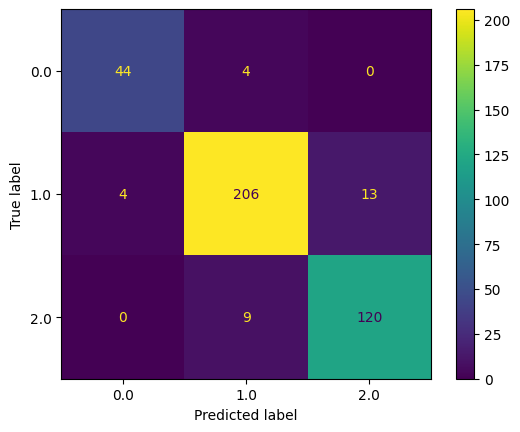

For a SVM model with GridSearch:  Precision = 0.920, Recall = 0.924, F1-score = 0.922


In [27]:
#Confusion matrix for SVM model using GridSearch
print(confusion_matrix(np.array(y_test), pred_svm_grid))
plot_confusion_matrix(svm_grid, X_test, y_test)
plt.show()
#Finding precision, recall and f-score for SVM (GridSearch) model and updating values in respective lists.
precision[4], recall[4], fscore[4], Nil = precision_recall_fscore_support(y_test, pred_svm_grid, average='macro')
print('For a SVM model with GridSearch:  Precision = %.3f, Recall = %.3f, F1-score = %.3f'%(precision[4], recall[4], fscore[4]))

### Comparing errors of diffferent models :

In [28]:
#list of models
models = ['DecisionTree', 'RandomForest', 'RandomForest\n(GridSearch)', 'SVM\t', 'SVM\n(GridSearch)']
print('Model\t\tError')
for i in range(5):
    print('{}\t{}'.format(models[i],error[i]))

Model		Error
DecisionTree	0.162
RandomForest	0.072
RandomForest
(GridSearch)	0.075
SVM		0.072
SVM
(GridSearch)	0.075


In [29]:
#From the above result, we can observe that the error is maximum in SVM and SVM with GridSearch model.
#Error is minimum in DecisionTree Model.
#We can't decide the best model for the given dataset only on the basis of error.
#In order to find the best fit, we need to consider precision and recall as well.

### Comparing results of diffferent models :

In [30]:
#Printing label lists
print(label_1)
print(label_2)
print(label_3)
print(label_4)

[2.0, 2.0, 1.0, 2.0, 1.0]
[2.0, 2.0, 2.0, 2.0, 2.0]
[1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0]


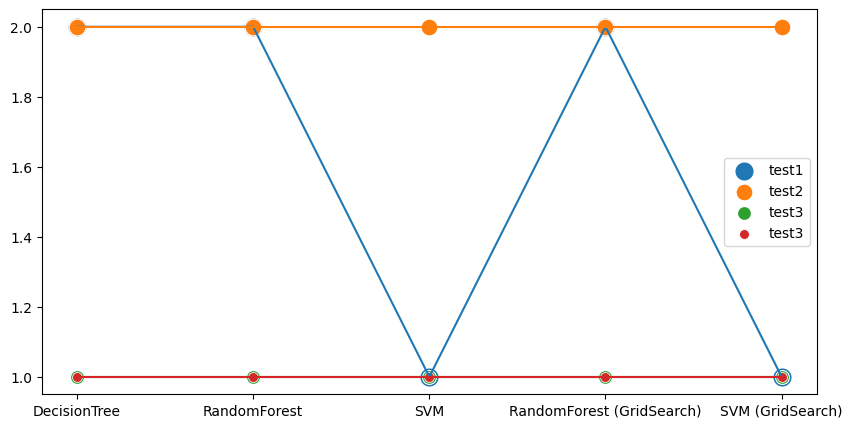

In [31]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = ['DecisionTree', 'RandomForest','SVM', 'RandomForest (GridSearch)', 'SVM (GridSearch)'], 
                y = label_1, s = 200, label = 'test1',)
sns.scatterplot(x = ['DecisionTree', 'RandomForest','SVM', 'RandomForest (GridSearch)', 'SVM (GridSearch)'], 
                y = label_2, s = 150, label = 'test2')
sns.scatterplot(x = ['DecisionTree', 'RandomForest','SVM', 'RandomForest (GridSearch)', 'SVM (GridSearch)'], 
                y = label_3, s = 100, label = 'test3')
sns.scatterplot(x = ['DecisionTree', 'RandomForest','SVM', 'RandomForest (GridSearch)', 'SVM (GridSearch)'], 
                y = label_4, s = 50, label = 'test3')
sns.lineplot(x = ['DecisionTree', 'RandomForest','SVM', 'RandomForest (GridSearch)', 'SVM (GridSearch)'], 
                y = label_1)
sns.lineplot(x = ['DecisionTree', 'RandomForest','SVM', 'RandomForest (GridSearch)', 'SVM (GridSearch)'], 
                y = label_2)
sns.lineplot(x = ['DecisionTree', 'RandomForest','SVM', 'RandomForest (GridSearch)', 'SVM (GridSearch)'], 
                y = label_3)
sns.lineplot(x = ['DecisionTree', 'RandomForest','SVM', 'RandomForest (GridSearch)', 'SVM (GridSearch)'], 
                y = label_4)
plt.show()

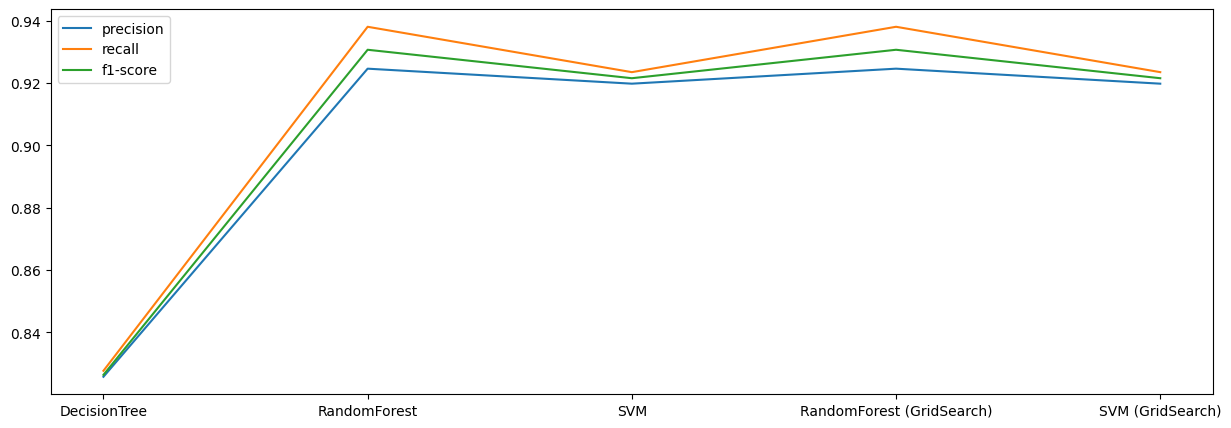

In [32]:
#Creating a line plot to compare teh precision, recall and f1-score of all the models.
#This graph is plotted to find the best fit for our dataset.
plt.figure(figsize=(15,5))
sns.lineplot(x = ['DecisionTree', 'RandomForest','SVM', 'RandomForest (GridSearch)', 'SVM (GridSearch)'], 
             y = precision,label = 'precision')
sns.lineplot(x = ['DecisionTree', 'RandomForest','SVM', 'RandomForest (GridSearch)', 'SVM (GridSearch)'], 
             y = recall,label = 'recall')
sns.lineplot(x = ['DecisionTree', 'RandomForest','SVM', 'RandomForest (GridSearch)', 'SVM (GridSearch)'], 
             y = fscore,label = 'f1-score')
plt.show()

In [33]:
#From the above plot, we can see that the RandomForest model with GridSearch is the best fit for the given dataset.

## Predicting results for the four applicants with the best fit model :

In [34]:
#Therefore the most accurate results for all the applicants are as follows.
possibility = {0: "High", 1: "Moderate", 2: "Low"}
print('Applicant\tLabel\tPossibility of Dyslexia')
print('1\t\t{}\t\t{}'.format(label_1[3], possibility[label_1[3]]))
print('2\t\t{}\t\t{}'.format(label_2[3], possibility[label_2[3]]))
print('3\t\t{}\t\t{}'.format(label_3[3], possibility[label_3[3]]))
print('4\t\t{}\t\t{}'.format(label_4[3], possibility[label_4[3]]))

Applicant	Label	Possibility of Dyslexia
1		2.0		Low
2		2.0		Low
3		1.0		Moderate
4		1.0		Moderate
